In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import confusion_matrix
import numpy as np
import math

# Binary classification
La clasificación binaria es el intento por responder preguntas del tipo sí/no, 1/0, etc.

El escenario es el siguiente. En nuestra empresa tenemos contratos con clientes y, el propósito es tener tantos clientes como sea posible, por lo que: uno, conseguimos nuevos clientes o, dos, mantenemos contratos con los clientes actuales. Dado que conseguir nuevos clientes suele ser más costosos, dedicarémos recursos para conservar a los clientes actuales.

Así que, utilizarémos datos del pasado para encontrar patrones que nos indiquen si un cliente tiene un alto *riesgo* de abandonar la empresa.

Vamos a cargar el dataset:

In [2]:
attrition_past=pd.read_csv('https://bradfordtuckfield.com/attrition_past.csv')
attrition_past.head()

,corporation,lastmonth_activity,lastyear_activity,number_of_employees,exited
0,abcd,78,1024,12,1
1,asdf,14,2145,20,0
2,xyzz,182,3891,35,0
3,acme,101,10983,2,1
4,qwer,0,118,42,1


El promedio de la variable `exited` demuestra que la deserción es un problema para la empresa.

In [3]:
attrition_past['exited'].mean()

0.5769230769230769

Al visualizar los datos de la actividad de 6-7 meses atrás junto con la deserción, vemos que la poca actividad está relacionada con la deserción.

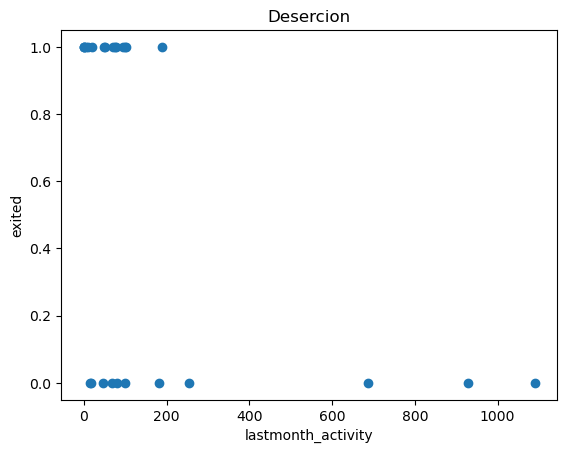

In [4]:
plt.scatter(attrition_past['lastmonth_activity'],attrition_past['exited'])
plt.title('Desercion')
plt.xlabel('lastmonth_activity')
plt.ylabel('exited')
plt.show()

## Regresión lineal

In [5]:
x = attrition_past['lastmonth_activity'].values.reshape(-1,1)
y = attrition_past['exited'].values.reshape(-1,1)
regressor = LinearRegression()
regressor.fit(x,y)

LinearRegression()

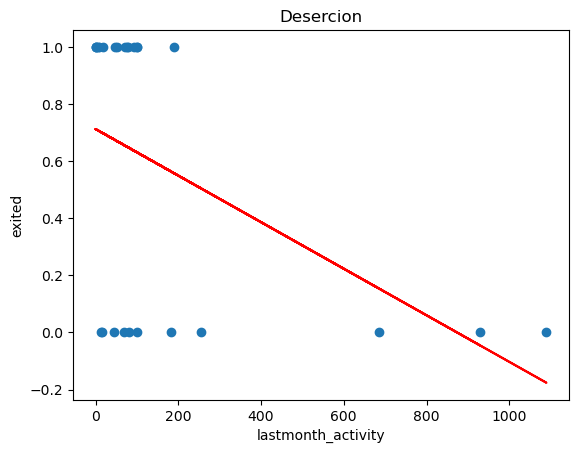

In [6]:
plt.scatter(attrition_past['lastmonth_activity'],attrition_past['exited'])
prediction = [regressor.coef_[0] * x + regressor.intercept_[0] for x in list(attrition_past['lastmonth_activity'])]
plt.plot(attrition_past['lastmonth_activity'], prediction,color='red')
plt.title('Desercion')
plt.xlabel('lastmonth_activity')
plt.ylabel('exited')
plt.show()

Los resultados de la regresión lineal se muestran en una recta que toma valores continuos. Interpretamos este valor como *la probabilidad de deserción a 6 meses después del registro*. Por consiguiente, procedemos a calcular la probabilidad de cada cliente según su actividad 6 meses atrás.

In [7]:
attrition_past['predicted'] = regressor.predict(x)

In [8]:
attrition_past.head()

,corporation,lastmonth_activity,lastyear_activity,number_of_employees,exited,predicted
0,abcd,78,1024,12,1,0.648363
1,asdf,14,2145,20,0,0.700525
2,xyzz,182,3891,35,0,0.563600
3,acme,101,10983,2,1,0.629618
4,qwer,0,118,42,1,0.711936


## Predicciones
Ocupamos un nuevo dataset con información similar al anterior, pero que se encuentra en el futuro. Vamos a cargarlo:

In [9]:
attrition_future=pd.read_csv('http://bradfordtuckfield.com/attrition2.csv')
attrition_future.head()

,corporation,lastmonth_activity,lastyear_activity,number_of_employees
0,hhtn,166,1393,91
1,slfm,824,16920,288
2,pryr,68,549,12
3,ahva,121,1491,16
4,dmai,4,94,2


No podemos ocupar los datos del dataset pasado, utilizamos en cambio los *patrones* del dataset pasado.

In [10]:
x = attrition_future['lastmonth_activity'].values.reshape(-1,1)
attrition_future['exited'] = regressor.predict(x)
attrition_future.head()

,corporation,lastmonth_activity,lastyear_activity,number_of_employees,exited
0,hhtn,166,1393,91,0.576641
1,slfm,824,16920,288,0.040352
2,pryr,68,549,12,0.656514
3,ahva,121,1491,16,0.613317
4,dmai,4,94,2,0.708676


La nueva columna del dataset futuro `exited` muestra la probabilidad de deserción según los patrones del dataset pasado.

### Decisiones de negocios
Hagamos el *top* 5 de los clientes con mayor probablidad de deserción en los próximos 6 meses.

In [11]:
attrition_future.nlargest(5, 'exited')

,corporation,lastmonth_activity,lastyear_activity,number_of_employees,exited
8,whsh,0,40,52,0.711936
12,mike,0,0,49,0.711936
24,pian,0,12,19,0.711936
21,bass,2,19,1400,0.710306
4,dmai,4,94,2,0.708676


O tal vez querrámos una lista de los clientes de la mayor a la menor probabilidad de deserción y prevenir su abandono.

In [12]:
list(attrition_future.sort_values(by='exited', ascending=False).loc[:,'corporation'])

['whsh',
 'pian',
 'mike',
 'bass',
 'pevc',
 'dmai',
 'ynus',
 'kdic',
 'hlpd',
 'angl',
 'erin',
 'oscr',
 'grce',
 'zamk',
 'hlly',
 'xkcd',
 'dwgt',
 'pryr',
 'skct',
 'frgv',
 'ejdc',
 'ahva',
 'wlcj',
 'hhtn',
 'slfm',
 'cred']

Otra posibilidad es recuperar los clientes que cuya probabilidad supera cierto umbral, por ejemplo $x=0.7$.

In [13]:
list(attrition_future.loc[attrition_future['exited']>0.7,'corporation'])

['dmai',
 'whsh',
 'oscr',
 'kdic',
 'mike',
 'pevc',
 'erin',
 'angl',
 'bass',
 'ynus',
 'pian',
 'hlpd']

## Midiendo la precisión

In [14]:
themedian = attrition_past['predicted'].median()
prediction= (1*(attrition_past['predicted']>themedian))
actual = list(attrition_past['exited'])

La estructura de una `confusion_matrix` es:
|||
|-|-|
| true positives | false positives |
| false negatives| true negatives |


In [15]:
confusion_matrix(prediction, actual)

array([[7, 6],
       [4, 9]], dtype=int64)

Una manera de medir la precisión es con las métricas Precision y Recall:
* La precision indica el porcentaje de predicciones correctas: **de lo que pensamos que era positivo, ¿cuánto fue positivo?**.
* Recall indica el porcentaje de: **de lo que era positivo, ¿cuánto pensamos que era positivo?** 

In [16]:
print('Precision: ',7/(7+6))
print('Recall: ',7/(7+4))

Precision:  0.5384615384615384
Recall:  0.6363636363636364


## Modelos multivariados

In [17]:
x3 = attrition_past.loc[:, ['lastmonth_activity', 'lastyear_activity', 'number_of_employees']].values.reshape(-1,3)
y = attrition_past.loc[:,'exited'].values.reshape(-1,1)
regressor_multi = LinearRegression()
regressor_multi.fit(x3, y)

LinearRegression()

Utilizamos los datos del futuro para hacer las predicciones:

In [18]:
x3 = attrition_future.loc[:, ['lastmonth_activity', 'lastyear_activity', 'number_of_employees']].values.reshape(-1,3)
attrition_future['predicted_multi'] = regressor_multi.predict(x3)
attrition_future.head()

,corporation,lastmonth_activity,lastyear_activity,number_of_employees,exited,predicted_multi
0,hhtn,166,1393,91,0.576641,0.736266
1,slfm,824,16920,288,0.040352,0.608358
2,pryr,68,549,12,0.656514,0.624016
3,ahva,121,1491,16,0.613317,0.585991
4,dmai,4,94,2,0.708676,0.653329


Note las limitaciones del modelo al predecir valores mayores que 1.

In [19]:
attrition_future.nlargest(5, 'predicted_multi')

,corporation,lastmonth_activity,lastyear_activity,number_of_employees,exited,predicted_multi
13,pevc,4,6,1686,0.708676,4.830318
21,bass,2,19,1400,0.710306,4.122548
6,frgv,80,954,1280,0.646733,3.756875
25,hlpd,12,149,226,0.702155,1.202120
17,angl,13,14,182,0.701340,1.092937


Listemos los resultados en orden descendente.

In [20]:
list(attrition_future.sort_values(by='predicted_multi', ascending=False).loc[:,'corporation'])

['pevc',
 'bass',
 'frgv',
 'hlpd',
 'angl',
 'oscr',
 'zamk',
 'whsh',
 'mike',
 'hhtn',
 'grce',
 'ejdc',
 'pian',
 'ynus',
 'dmai',
 'kdic',
 'erin',
 'dwgt',
 'pryr',
 'hlly',
 'xkcd',
 'slfm',
 'skct',
 'ahva',
 'wlcj',
 'cred']

## Métricas derivadas
Además de utilizar los datos *crudos*, podríamos intentar obtener **información de valor** con los datos actuales. Por ejemplo, podemos medir la **actividad por empleado** dividiendo la actividad por el número de empleos de un cliente. Aunque un cliente tenga pocos empleados, el valor de la actividad por empleado es más alto.

In [21]:
attrition_past['activity_per_employee'] = attrition_past.loc[:,'lastmonth_activity']/attrition_past.loc[:,'number_of_employees']
x = attrition_past.loc[:,['activity_per_employee', 'lastmonth_activity', 'lastyear_activity','number_of_employees']].values.reshape(-1,4)
y = attrition_past.loc[:,'exited'].values.reshape(-1,1)
# Regresor
regressor_derived = LinearRegression()
regressor_derived.fit(x,y)
attrition_past['predicted3'] = regressor_derived.predict(x) # Datos pasados

In [22]:
attrition_future['activity_per_employee'] = attrition_future.loc[:,'lastmonth_activity']/attrition_future.loc[:,'number_of_employees']
x = attrition_future.loc[:,['activity_per_employee', 'lastmonth_activity', 'lastyear_activity','number_of_employees']].values.reshape(-1,4)
attrition_future['predicted3'] = regressor_derived.predict(x) # Datos futuros

In [23]:
list(attrition_future.sort_values(by='predicted3', ascending=False).loc[:,'corporation'])

['pevc',
 'bass',
 'frgv',
 'hlpd',
 'angl',
 'oscr',
 'zamk',
 'whsh',
 'mike',
 'hhtn',
 'ejdc',
 'grce',
 'pian',
 'ynus',
 'dmai',
 'kdic',
 'erin',
 'slfm',
 'dwgt',
 'pryr',
 'hlly',
 'xkcd',
 'skct',
 'ahva',
 'wlcj',
 'cred']

Vamos a evaluar la precisión del modelo con una confusion matrix.

In [24]:
themedian = attrition_past['predicted3'].median()
prediction= list(1*(attrition_past['predicted3']>themedian))
actual = list(attrition_past['exited'])
confusion_matrix(prediction, actual)

array([[ 9,  4],
       [ 2, 11]], dtype=int64)

Los valores precision y recall resultan en:

In [25]:
print('precision: ', 9/(9+4))
print('recall: ', 9/(9+2))

precision:  0.6923076923076923
recall:  0.8181818181818182


## Regresión logística
El modelo de regresión logística toma valores entre 0 y 1. Se describe matemáticamente con la función:

$$logistic(x)=\frac{1}{1+e^{-(\beta_0+\beta_1x)}}$$

El modelo ocupa la estructura de una recta $y=\beta_0+\beta_1x$. Por ejemplo la función

$$f(x)=\frac{1}{1+e^{-1-2x}}$$


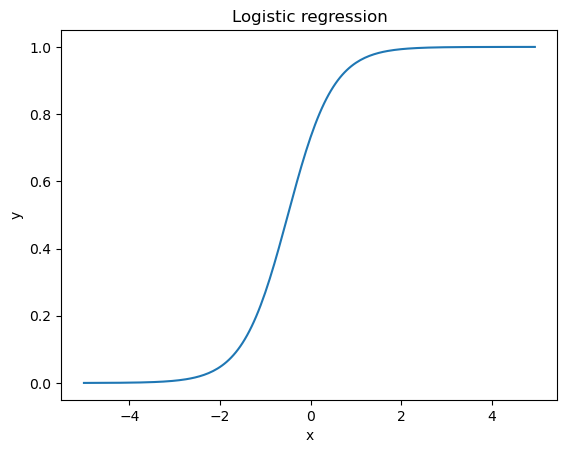

In [26]:
x = np.arange(-5,5,0.05)
y = (1/(1+np.exp(-1-2*x)))
plt.plot(x,y)
plt.title('Logistic regression')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

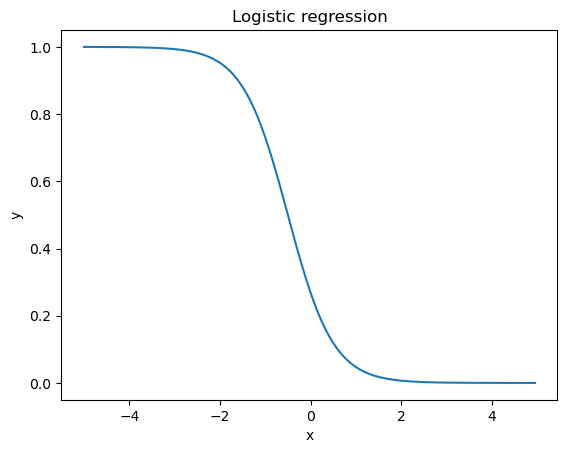

In [27]:
x = np.arange(-5,5,0.05)
y = (1/(1+np.exp(1+2*x)))
plt.plot(x,y)
plt.title('Logistic regression')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

La regresión logística aplicada al dataset pasado:

In [35]:
model = LogisticRegression(solver='liblinear', random_state=0)
x = attrition_past['lastmonth_activity'].values.reshape(-1,1)
y = attrition_past['exited']
model.fit(x,y)

LogisticRegression(random_state=0, solver='liblinear')

In [36]:
attrition_past['logisticpredict'] = model.predict_proba(x)[:,1]

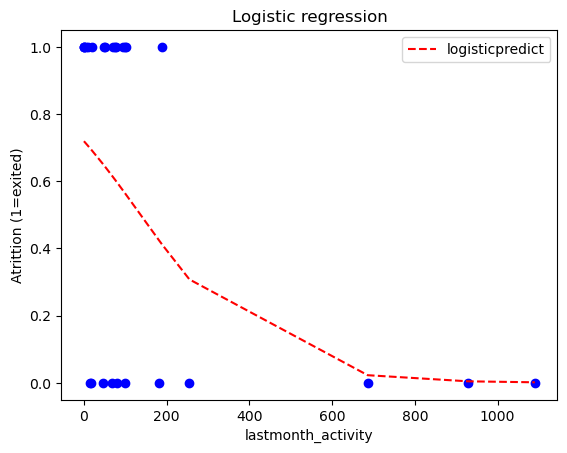

In [37]:
fig = plt.scatter(attrition_past['lastmonth_activity'],attrition_past['exited'], color='blue')
attrition_past.sort_values('lastmonth_activity').plot('lastmonth_activity', 'logisticpredict', ls='--', ax=fig.axes, color='red')
plt.title('Logistic regression')
plt.xlabel('lastmonth_activity')
plt.ylabel('Atrittion (1=exited)')
plt.show()

Ahora apliquemos la regresión logística al dataset futuro:

In [38]:
x = attrition_future['lastmonth_activity'].values.reshape(-1,1)
attrition_future['logisticpredict'] = model.predict_proba(x)[:,1]
list(attrition_future.sort_values(by='logisticpredict', ascending=False).loc[:,'corporation'])

['whsh',
 'pian',
 'mike',
 'bass',
 'pevc',
 'dmai',
 'ynus',
 'kdic',
 'hlpd',
 'angl',
 'erin',
 'oscr',
 'grce',
 'zamk',
 'hlly',
 'xkcd',
 'dwgt',
 'pryr',
 'skct',
 'frgv',
 'ejdc',
 'ahva',
 'wlcj',
 'hhtn',
 'slfm',
 'cred']

Interpretamos los valores como la probabilidad de deserción (1=exited). Por lo tanto, valores cercanos a 1 indican que es muy probable la deserción, mientras que valores cercanos a 0 indican que es poco probable.

In [39]:
model.predict_proba(x)[:,1]

array([0.45009389, 0.00886046, 0.61596305, 0.52712825, 0.71336597,
       0.60289221, 0.59630001, 0.68449235, 0.71894755, 0.69912642,
       0.70200646, 0.57128641, 0.71894755, 0.71336597, 0.69912642,
       0.62565853, 0.00285224, 0.70056843, 0.67703327, 0.62082285,
       0.46372041, 0.71616504, 0.70629661, 0.65256566, 0.71894755,
       0.70200646])